<a href="https://colab.research.google.com/github/AdvikaSase/Brain_Tumor_Segmentation_BCP/blob/main/Week2_PytorchAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

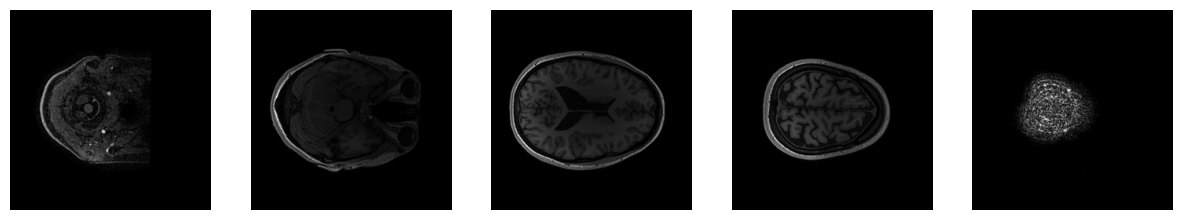

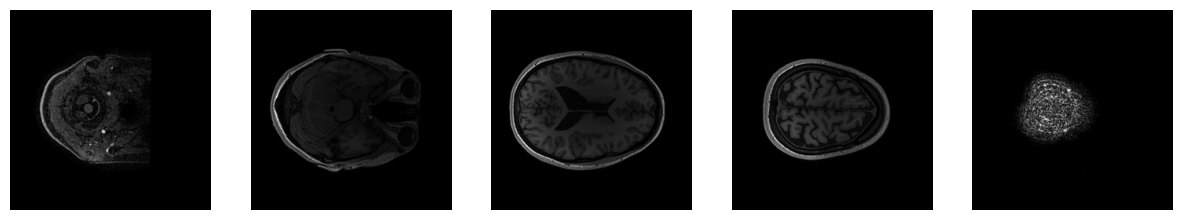

Tumor slices: 105


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from skimage.transform import resize

mri_path = "/content/sub-001_ses-01_run-001_T1w.nii.gz"
mask_path = None
img = nib.load(mri_path)
volume = img.get_fdata()
volume = np.transpose(volume, (2, 0, 1)) if volume.ndim == 3 else volume

if mask_path:
    msk = nib.load(mask_path).get_fdata()
    mask = np.transpose(msk, (2, 0, 1))
else:
    mask = (volume > np.percentile(volume, 99)).astype(np.uint8)

indices = np.linspace(0, volume.shape[0]-1, 5, dtype=int)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(volume[idx], cmap="gray")
    plt.axis("off")
plt.show()

def plot_slices(vol, idxs):
    plt.figure(figsize=(15, 3))
    for i, k in enumerate(idxs):
        plt.subplot(1, len(idxs), i+1)
        plt.imshow(vol[k], cmap="gray")
        plt.axis("off")
    plt.show()

plot_slices(volume, indices)

def normalize_volume(vol):
    out = np.zeros_like(vol)
    for i in range(vol.shape[0]):
        s = vol[i]
        out[i] = (s - s.min()) / (s.max() - s.min() + 1e-8)
    return out

norm_volume = normalize_volume(volume)

def resize_volume(vol, size=(128, 128)):
    out = np.zeros((vol.shape[0], size[0], size[1]))
    for i in range(vol.shape[0]):
        out[i] = resize(vol[i], size, anti_aliasing=True)
    return out

resized_volume = resize_volume(norm_volume)
resized_mask = resize_volume(mask)

def count_tumor_slices(msk):
    c = 0
    for i in range(msk.shape[0]):
        if np.any(msk[i] > 0):
            c += 1
    return c

print("Tumor slices:", count_tumor_slices(resized_mask))
